In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('shopping.csv')
data.shape

(3900, 18)

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


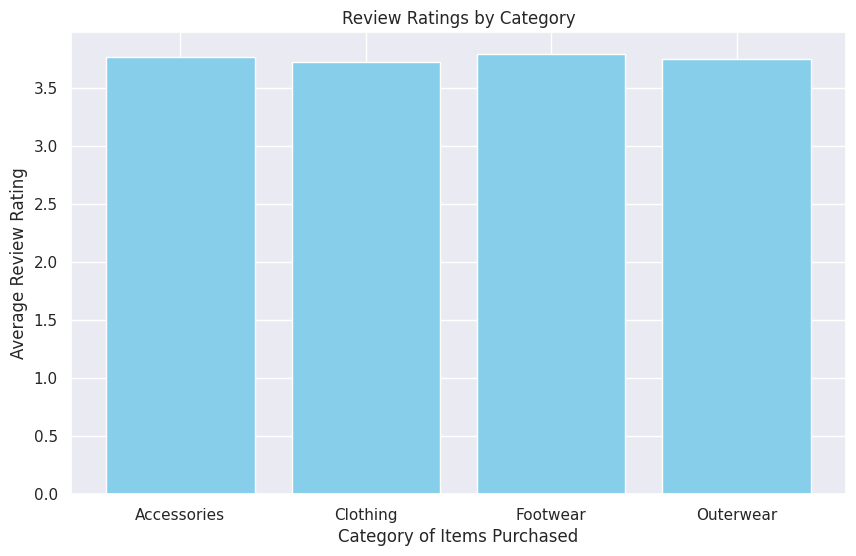

In [ ]:

avg_ratings = data.groupby('Category')['Review Rating'].mean().reset_index()


#visualizing the review ratings per category

plt.figure(figsize=(10, 6))
plt.bar(avg_ratings['Category'], avg_ratings['Review Rating'], color='skyblue')
plt.xlabel('Category of Items Purchased')
plt.ylabel('Average Review Rating')
plt.title('Review Ratings by Category')
plt.show()


<ipython-input-103-0017079f4bb4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=avg_ratings, palette='viridis')


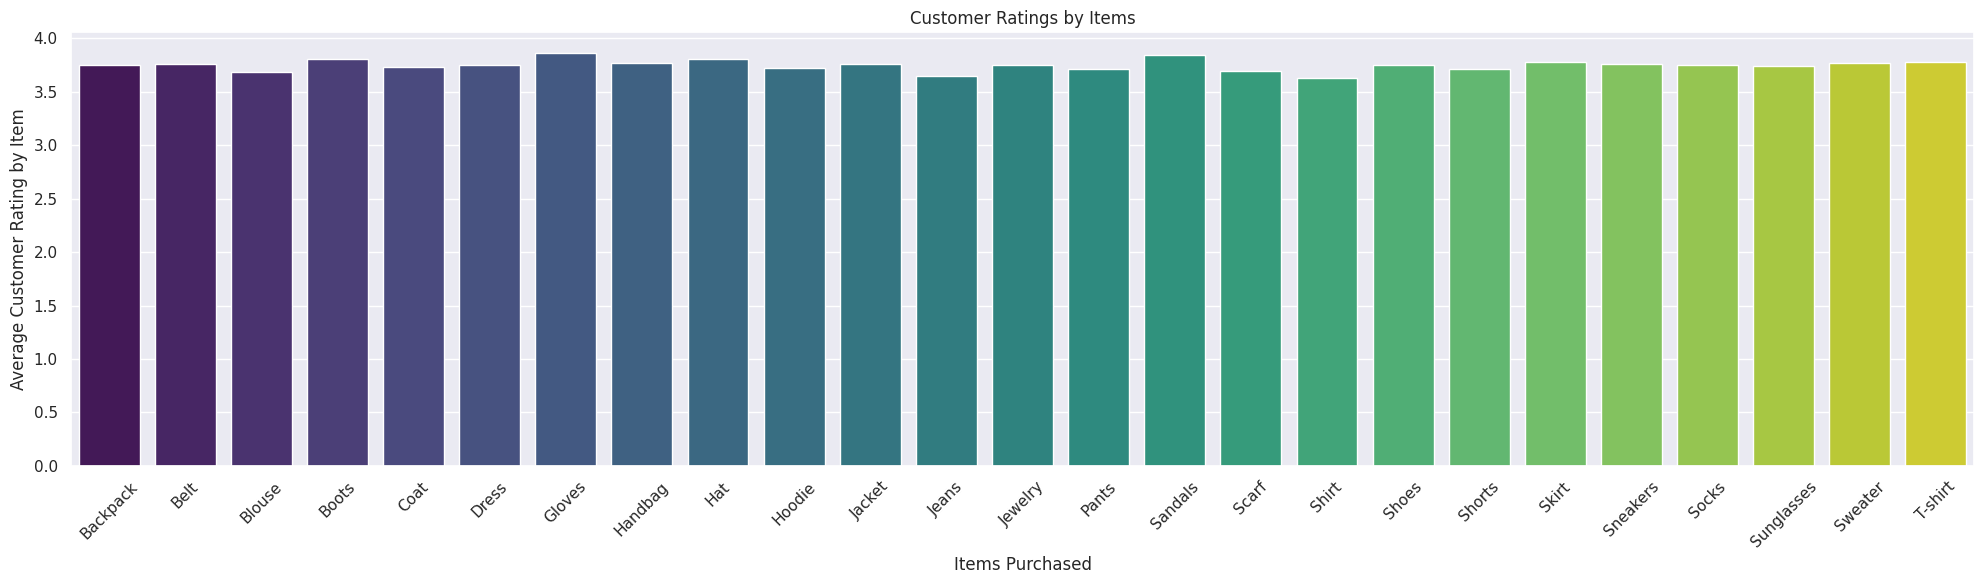

In [ ]:

avg_ratings = data.groupby('Item Purchased')['Review Rating'].mean().reset_index()


#visualizing the review ratings per Item

plt.figure(figsize=(20, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=avg_ratings, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating by Item')
plt.title('Customer Ratings by Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-104-fe475b288b53>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=lowest_rated_items, palette='viridis')


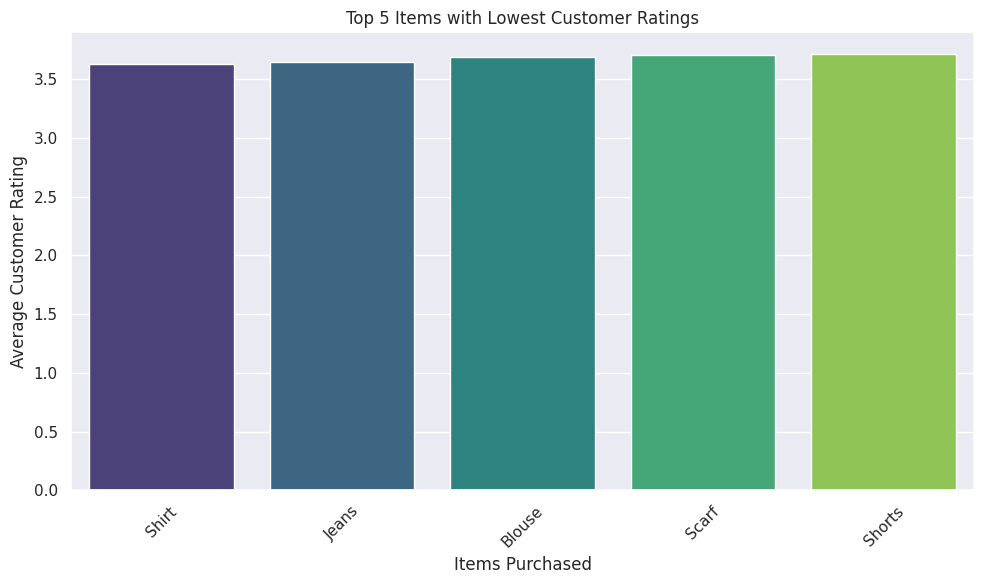

Top 5 items with the lowest average ratings:
   Item Purchased  Review Rating
16          Shirt       3.629586
11          Jeans       3.648387
2          Blouse       3.683626
15          Scarf       3.700000
18         Shorts       3.711465


In [ ]:
# Get the 5 items with the lowest ratings
sorted_ratings = avg_ratings.sort_values(by='Review Rating', ascending=True)
lowest_rated_items = sorted_ratings.head(5)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=lowest_rated_items, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating')
plt.title('Top 5 Items with Lowest Customer Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the 5 items with the lowest ratings
print("Top 5 items with the lowest average ratings:")
print(lowest_rated_items)

<ipython-input-105-9208b0cc59e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=highest_rated_items, palette='viridis')


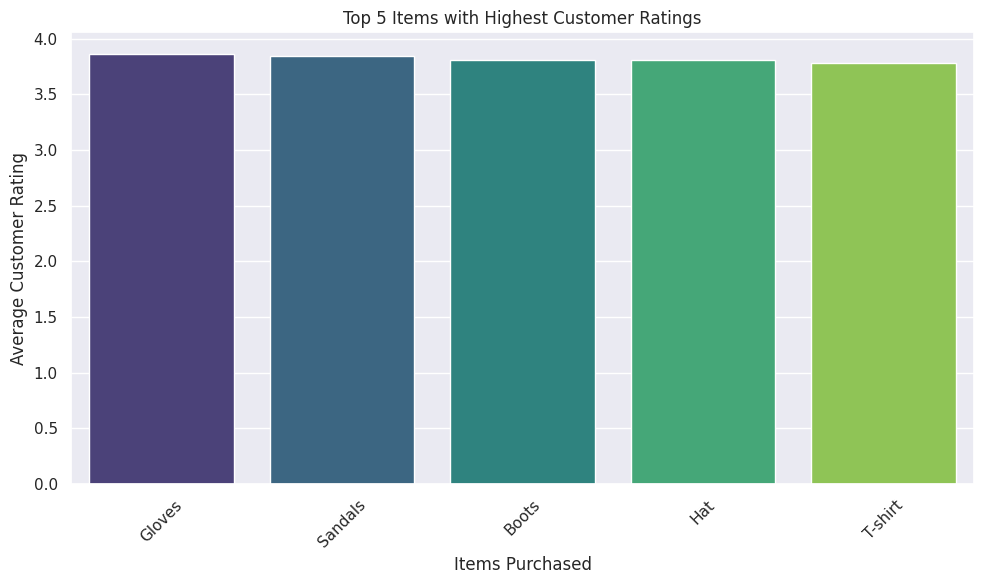

Top 5 items with the lowest average ratings:
   Item Purchased  Review Rating
6          Gloves       3.864286
14        Sandals       3.841250
3           Boots       3.812500
8             Hat       3.806494
24        T-shirt       3.782993


In [ ]:
# Get the 5 items with the best ratings
sorted_ratings = avg_ratings.sort_values(by='Review Rating', ascending=False)
highest_rated_items = sorted_ratings.head(5)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=highest_rated_items, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating')
plt.title('Top 5 Items with Highest Customer Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the 5 items with the lowest ratings
print("Top 5 items with the lowest average ratings:")
print(highest_rated_items)

In [ ]:
data['Subscription Status'].nunique()

2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features for customer satisfaction
features_for_customer_satisfaction = [
    'Review Rating',
    'Purchase Amount (USD)',
    'Discount Applied',
    'Previous Purchases',
    'Shipping Type',
    'Category'
]

satisfaction_data = data[features_for_customer_satisfaction]

#Encoding the Shipping Type, Category and Discount Applied
label_encoder = LabelEncoder()
satisfaction_data['Discount Applied'] = label_encoder.fit_transform(satisfaction_data['Discount Applied'])
satisfaction_data['Shipping Type'] = label_encoder.fit_transform(satisfaction_data['Shipping Type'])
satisfaction_data['Category'] = label_encoder.fit_transform(satisfaction_data['Category'])


<ipython-input-107-d9a89b3eb448>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Discount Applied'] = label_encoder.fit_transform(satisfaction_data['Discount Applied'])
<ipython-input-107-d9a89b3eb448>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Shipping Type'] = label_encoder.fit_transform(satisfaction_data['Shipping Type'])
<ipython-input-107-d9a89b3eb448>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

#Performing KMeans Clustering to see Customer Satisfaction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-108-55e2933c1613>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Cluster'] = kmeans.fit_predict(satisfaction_data)
<ipython-input-108-55e2933c1613>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Cluster Name'] = satisfact

Cluster 0: Avg Rating: 3.72 Cluster 1: Avg Rating: 3.79 Cluster 2: Avg Rating: 3.72 Cluster 3: Avg Rating: 3.77 

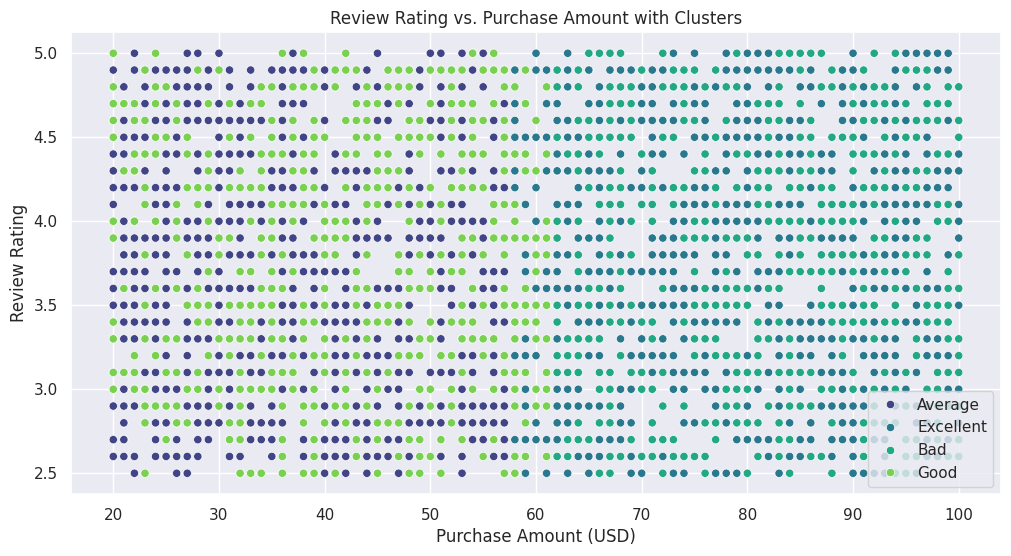

In [ ]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
satisfaction_data['Cluster'] = kmeans.fit_predict(satisfaction_data)

# Calculate average rating for each cluster
average_ratings = satisfaction_data.groupby('Cluster')['Review Rating'].mean()

# Map cluster names to integers
cluster_names = {
    0: 'Good',
    1: 'Bad',
    2: 'Average',
    3: 'Excellent'
}
satisfaction_data['Cluster Name'] = satisfaction_data['Cluster'].map(cluster_names)

# Visualizing clusters with average ratings
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Review Rating', hue='Cluster Name', data=satisfaction_data, palette='viridis', legend='full')

for i, txt in enumerate(average_ratings):
    print(f"Cluster {i}: Avg Rating: {round(txt, 2)} ", end="")

plt.title("Review Rating vs. Purchase Amount with Clusters")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.legend()
plt.show()


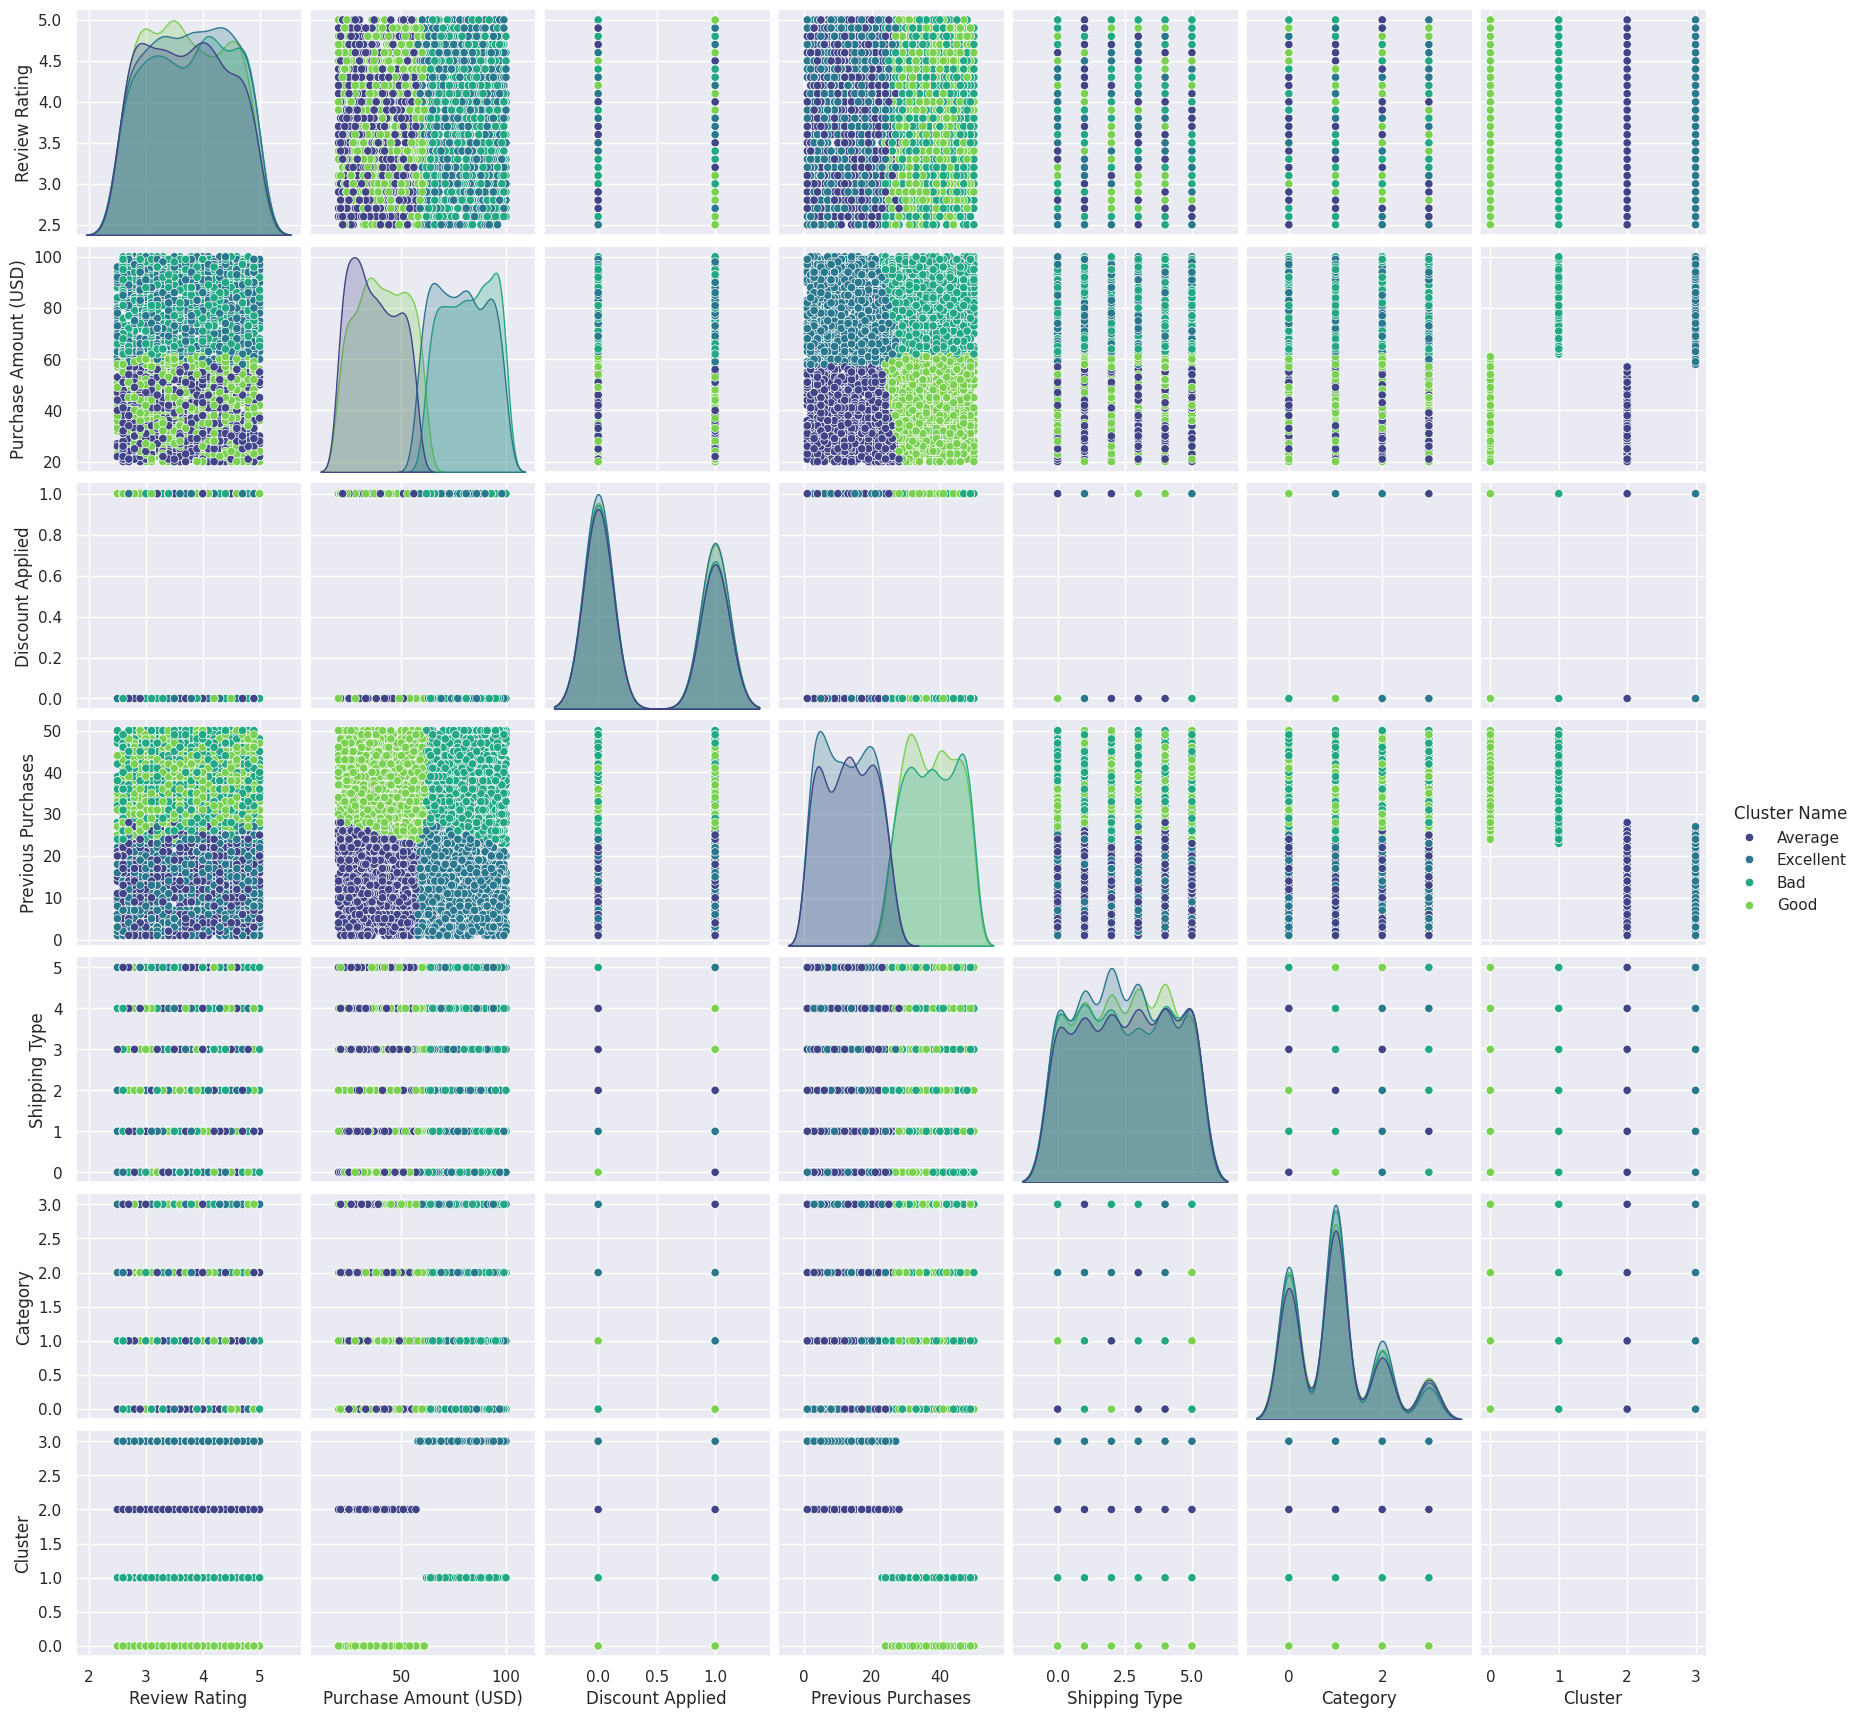


Average Review Ratings by Cluster:
Cluster Name
Average      3.716167
Bad          3.788421
Excellent    3.774485
Good         3.719860
Name: Review Rating, dtype: float64


In [ ]:
# Visualize clusters
sns.pairplot(satisfaction_data, hue='Cluster Name', palette='viridis')
plt.show()

# Analyzing clusters
# calculating average 'Review Rating' for each cluster
average_ratings = satisfaction_data.groupby('Cluster Name')['Review Rating'].mean()
print("\nAverage Review Ratings by Cluster:")
print(average_ratings)

Cluster 0: Avg Rating: 3.72 Cluster 1: Avg Rating: 3.79 Cluster 2: Avg Rating: 3.77 Cluster 3: Avg Rating: 3.72 

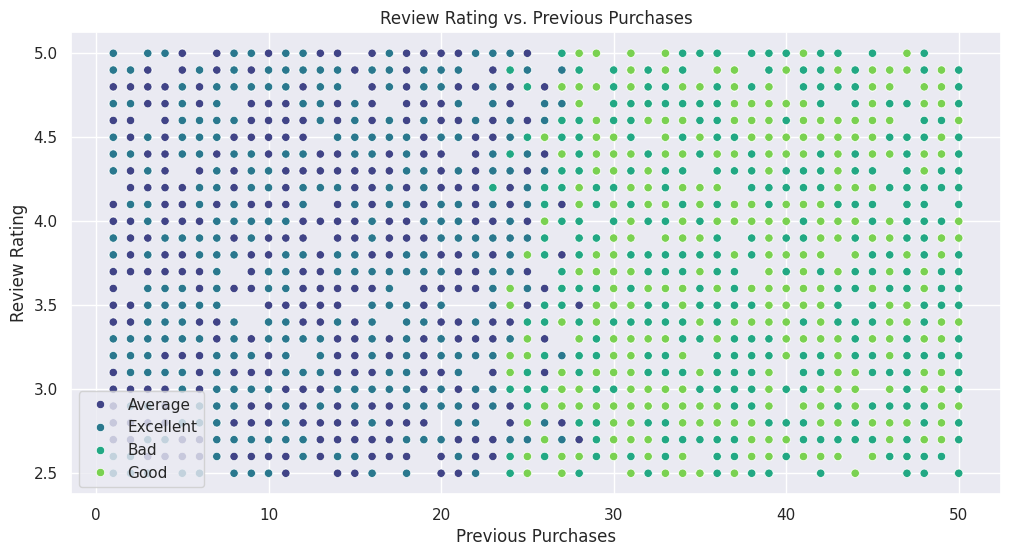

In [ ]:
# Visualizing clusters with average ratings
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Previous Purchases', y='Review Rating', hue='Cluster Name', data=satisfaction_data, palette='viridis', legend='full')
for i, txt in enumerate(average_ratings):
    print(f"Cluster {i}: Avg Rating: {round(txt, 2)} ", end="")

plt.title("Review Rating vs. Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Review Rating")
plt.legend()
plt.show()

Cluster 0: Avg Rating: 3.72 Cluster 1: Avg Rating: 3.79 Cluster 2: Avg Rating: 3.77 Cluster 3: Avg Rating: 3.72 

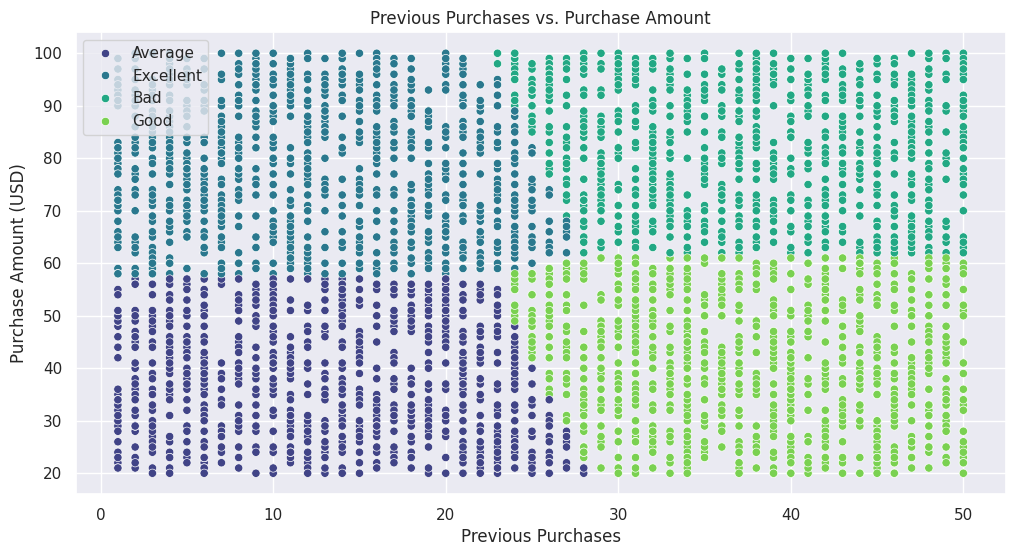

In [ ]:
# Visualizing clusters with average ratings
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', hue='Cluster Name', data=satisfaction_data, palette='viridis', legend='full')

for i, txt in enumerate(average_ratings):
    print(f"Cluster {i}: Avg Rating: {round(txt, 2)} ", end="")

plt.title("Previous Purchases vs. Purchase Amount")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.legend()
plt.show()